In [1]:
from src.base import FDTD2D
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Parameters
params = {
    'grid_size_x': 300,
    'grid_size_y': 300,
    'time_steps': 20,
    'dx': 0.01,
    'dy': 0.01,
    'dt':  0.01/6e8,
    'pml_thickness': 10,
    'polarization': 'TM',
    'tfsf_thickness': 10,
    'order': 1,
    'r_err': 1e-6,
    'use_pml' : True
}

### Testing initializations

In [16]:
params['polarization'] = 'TM'

tm_sim = FDTD2D(params)
print(f"\nTM Polarization:")
print(f"Hx grid shape: {tm_sim.Hx.shape}")
print(f"Hy grid shape: {tm_sim.Hy.shape}")
print(f"Ez grid shape: {tm_sim.Ez.shape}")


TM Polarization:
Hx grid shape: torch.Size([300, 300])
Hy grid shape: torch.Size([300, 300])
Ez grid shape: torch.Size([300, 300])


### Test material distribution

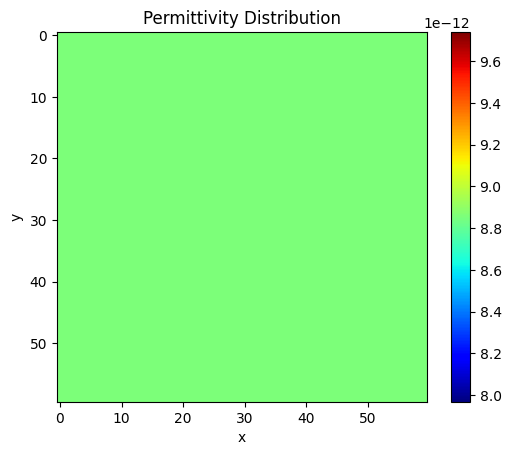

In [47]:
# Visualize permittivity distribution
plt.imshow(tm_sim.epsilon, cmap='jet')
plt.title('Permittivity Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(cmap='jet')
plt.show()

In [17]:
for i in range(1,600):
    tm_sim.simulation_step(i)

In [18]:
def plot_e_field_contour(ax, data): 
    """Contour Plot of E field at a single time step""" 
    CP = plt.contour(X, Y, data, linestyles='solid') 
    CP.collections[4].remove() 
    # above removes extraneous outer contour display 
    ax.set_xticks(np.arange(0, 300, step=20)) 
    ax.set_yticks(np.arange(0,300, step=20)) 
    plt.xlabel('cm') 
    plt.ylabel('cm')

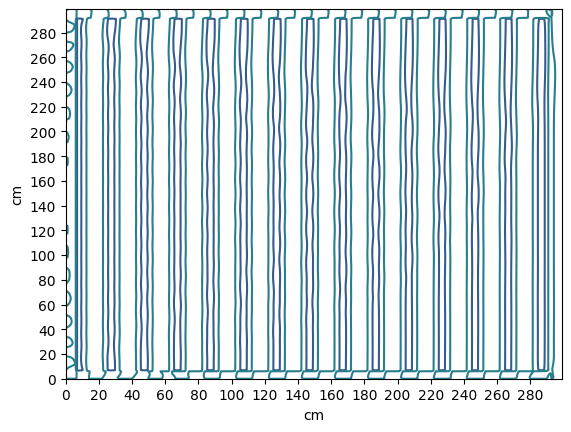

In [19]:
X, Y = np.meshgrid(range(tm_sim.grid_size_x), range(tm_sim.grid_size_y))
fig, ax = plt.subplots()
plot_e_field_contour(ax, tm_sim.Ez)


In [14]:
def plot_e_field(ax, data, timestep, label):
    """
    3D Plot of E field at a single time step
    """
    #ax.set_zlim(0, 1)
    #ax.view_init(elev=20., azim=45)
    ax.plot_surface(X, Y, data[:, :], rstride=1, cstride=1,
                    color='white', edgecolor='black', linewidth=.25)
    ax.zaxis.set_rotate_label(False)
    ax.set_zlabel(r'$E_{Z}$', rotation=90, labelpad=10, fontsize=14)
    ax.set_zticks([0, 0.5, 1])
    ax.set_xlabel('cm')
    ax.set_ylabel('cm')
    ax.set_xticks(np.arange(0, 301, step=20))
    ax.set_yticks(np.arange(0, 301, step=20))
    ax.text2D(0.6, 0.7, "T = {}".format(timestep), transform=ax.transAxes)
    plt.gca().patch.set_facecolor('white')
    ax.text2D(-0.2, 0.8, "({})".format(label), transform=ax.transAxes)
    ax.dist = 11


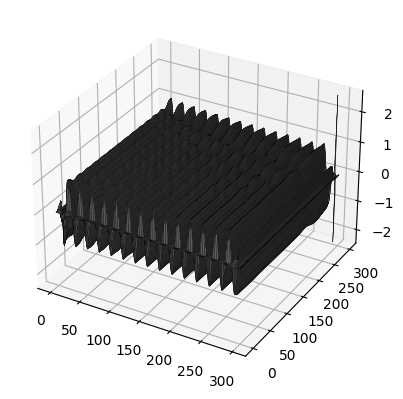

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, tm_sim.Ez[:, :], rstride=1, cstride=1,
                    color='white', edgecolor='black', linewidth=.25)